In [1]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
mnist = datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),mnist.target, test_size=0.25, random_state=42)

In [5]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,test_size=0.1, random_state=84)

In [6]:
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [7]:
kVals = range(1, 30, 2)
accuracies = []
error_rate = []   # to cal elbow method

for k in range(1, 30,2):
   
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
 
    score = model.score(valData, valLabels)
    
    preid_i = model.predict(testData)
    error_rate.append(np.mean(preid_i != testLabels))
    
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
 
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


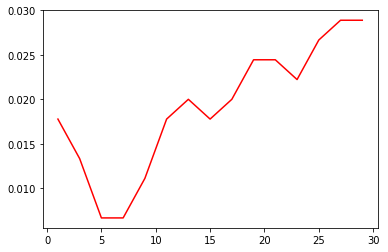

In [8]:
plt.plot(range(1,30,2),error_rate,color='red')

In [9]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))
print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Confusion matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]

In [ ]:
for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(5,)))):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image.reshape(1, -1))[0]
 
    # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
    # show the prediction
    print("Digit is {}".format(prediction))
    cv2.imshow("Image", image)
    cv2.waitKey(0)

Digit is 3
